## COVID-19 Country Analysis

This file looks at some summary statistics regarding active COVID-19 cases, as well as deaths related to the virus. Last day of data for this analysis is March 21, 2020.

In [2]:
import pandas as pd

covid_data = pd.read_csv('covid_19_data.csv')
covid_data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [3]:
mainland_china = covid_data[covid_data['Country/Region'] == 'Mainland China']
mainland_china.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
cases_by_date = mainland_china[['ObservationDate', 'Confirmed', 'Recovered', 'Deaths']].groupby('ObservationDate').sum()
cases_by_date.head()

,Confirmed,Recovered,Deaths
ObservationDate,,,
01/22/2020,547.0,28.0,17.0
01/23/2020,639.0,30.0,18.0
01/24/2020,916.0,36.0,26.0
01/25/2020,1399.0,39.0,42.0
01/26/2020,2062.0,49.0,56.0


In [5]:
# add new row for active cases
cases_by_date['Active'] = cases_by_date['Confirmed'] - cases_by_date['Recovered']
cases_by_date.head()

,Confirmed,Recovered,Deaths,Active
ObservationDate,,,,
01/22/2020,547.0,28.0,17.0,519.0
01/23/2020,639.0,30.0,18.0,609.0
01/24/2020,916.0,36.0,26.0,880.0
01/25/2020,1399.0,39.0,42.0,1360.0
01/26/2020,2062.0,49.0,56.0,2013.0


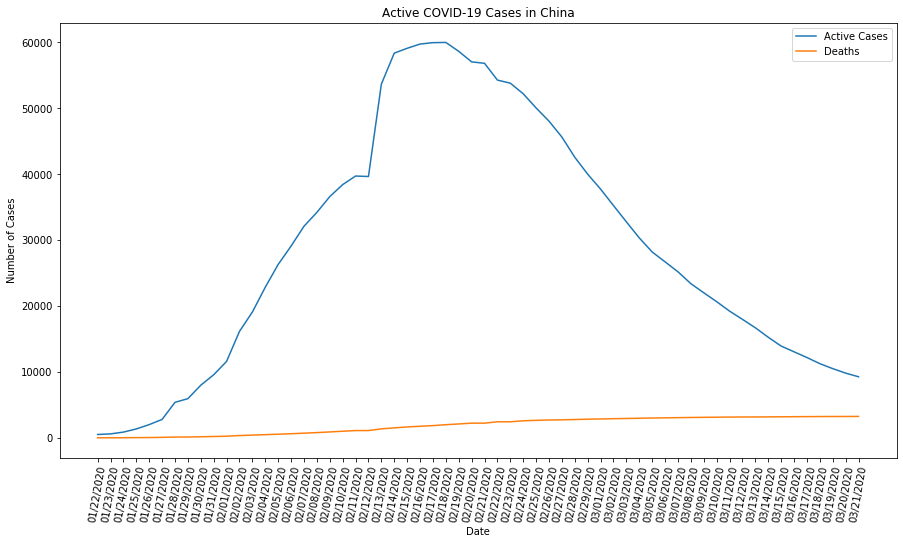

In [6]:
from matplotlib import pyplot as plt

# time series of cases for China
fig = plt.figure(figsize=(15, 8))
plt.plot(cases_by_date.index, cases_by_date['Active'], label='Active Cases')
plt.plot(cases_by_date.index, cases_by_date['Deaths'], label='Deaths')
plt.xticks(rotation=80)
plt.title('Active COVID-19 Cases in China')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()

In [7]:
usa = covid_data[covid_data['Country/Region'] == 'US']
us_cases_by_date = usa[['ObservationDate', 'Confirmed', 'Recovered', 'Deaths']].groupby('ObservationDate').sum()
us_cases_by_date['Active'] = us_cases_by_date['Confirmed'] - us_cases_by_date['Recovered']                                  
us_cases_by_date.head()

,Confirmed,Recovered,Deaths,Active
ObservationDate,,,,
01/22/2020,1.0,0.0,0.0,1.0
01/23/2020,1.0,0.0,0.0,1.0
01/24/2020,2.0,0.0,0.0,2.0
01/25/2020,2.0,0.0,0.0,2.0
01/26/2020,5.0,0.0,0.0,5.0


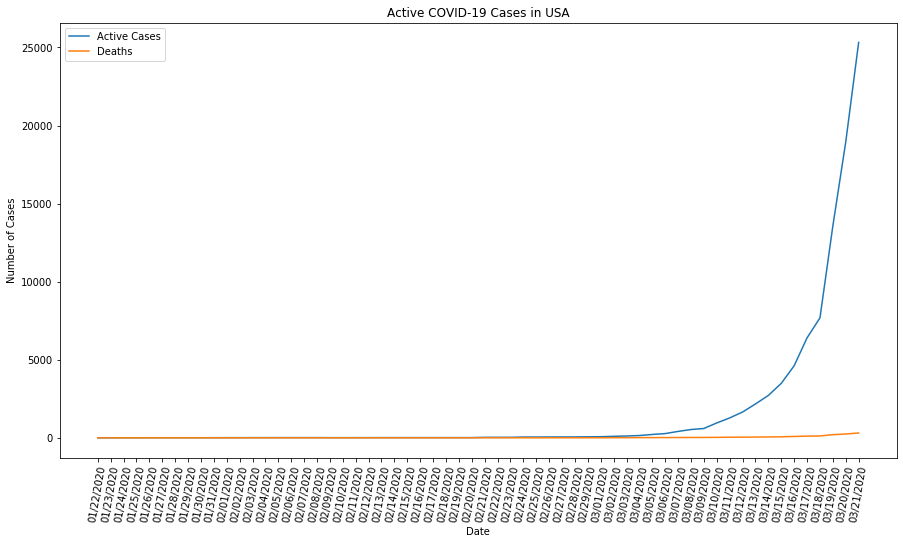

In [8]:
# Time Series of Active COVID-19 cases in the U.S.
                                                                                                                                
fig = plt.figure(figsize=(15, 8))
plt.plot(us_cases_by_date.index, us_cases_by_date['Active'], label='Active Cases')
plt.plot(us_cases_by_date.index, us_cases_by_date['Deaths'], label='Deaths')
plt.xticks(rotation=80)             
plt.title('Active COVID-19 Cases in USA')
plt.xlabel('Date')                                                                                      
plt.ylabel('Number of Cases')
plt.legend()

In [28]:
country_stats = covid_data[['Country/Region', 'Confirmed', 'Recovered', 'Deaths']].groupby('Country/Region').max()
country_stats.head()

,Confirmed,Recovered,Deaths
Country/Region,,,
Azerbaijan,1.0,0.0,0.0
"('St. Martin',)",2.0,0.0,0.0
Afghanistan,24.0,1.0,0.0
Albania,76.0,2.0,2.0
Algeria,139.0,32.0,15.0


In [29]:
# Add a new 'Active' column for active cases
country_stats['Active'] = country_stats['Confirmed'] - country_stats['Recovered']

# Sort countries by Active cases
country_stats.sort_values('Active', axis = 0, ascending = False, inplace = True) 
country_stats.head(10)

,Confirmed,Recovered,Deaths,Active
Country/Region,,,,
Italy,53578.0,6072.0,4825.0,47506.0
Spain,25374.0,2125.0,1375.0,23249.0
Germany,22213.0,233.0,84.0,21980.0
France,14282.0,12.0,562.0,14270.0
Iran,20610.0,7635.0,1556.0,12975.0
US,11710.0,171.0,94.0,11539.0
Mainland China,67800.0,58946.0,3139.0,8854.0
South Korea,8799.0,1540.0,102.0,7259.0
Switzerland,6575.0,15.0,75.0,6560.0


Text(0.5, 0, 'Active Cases')

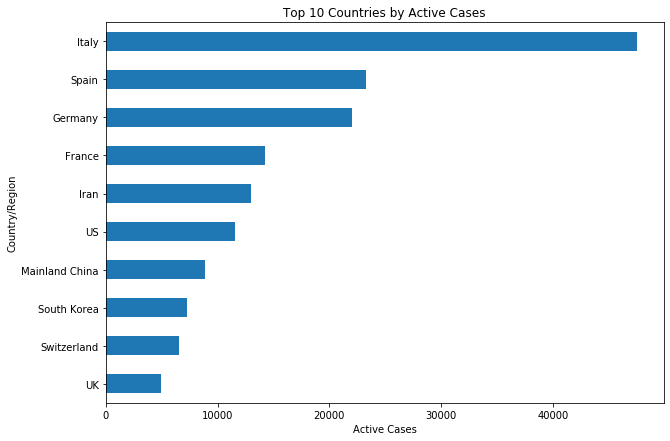

In [34]:
# Horizontal bar chart of top 10 countries based on Active cases
top_ten_active = country_stats.iloc[0:10]

fig = plt.figure(figsize=(10, 7))

top_ten_active['Active'].plot(kind='barh').invert_yaxis()
plt.title('Top 10 Countries by Active Cases')
plt.xlabel('Active Cases')

In [35]:
# Sort data frame on 'Deaths' column and verify data
country_stats.sort_values('Deaths', axis = 0, ascending = False, inplace = True) 
country_stats.head(10)

,Confirmed,Recovered,Deaths,Active
Country/Region,,,,
Italy,53578.0,6072.0,4825.0,47506.0
Mainland China,67800.0,58946.0,3139.0,8854.0
Iran,20610.0,7635.0,1556.0,12975.0
Spain,25374.0,2125.0,1375.0,23249.0
France,14282.0,12.0,562.0,14270.0
UK,5018.0,65.0,233.0,4953.0
Netherlands,3631.0,2.0,136.0,3629.0
South Korea,8799.0,1540.0,102.0,7259.0
US,11710.0,171.0,94.0,11539.0


Text(0.5, 0, 'Deaths')

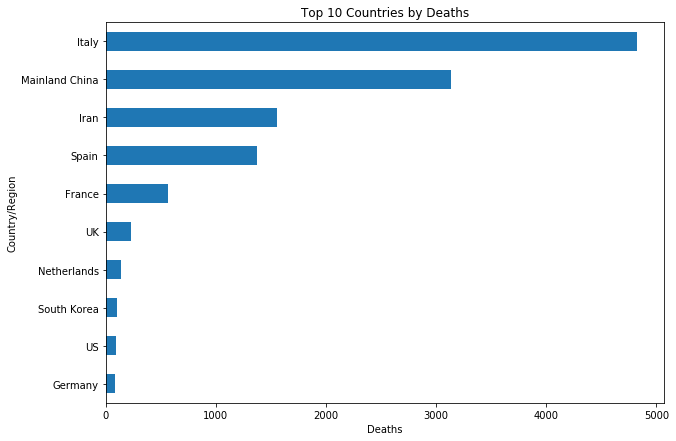

In [36]:
# Horizontal bar chart of top 10 countries by deaths
top_ten_deaths = country_stats.iloc[0:10]

fig = plt.figure(figsize=(10, 7))

top_ten_deaths['Deaths'].plot(kind='barh').invert_yaxis()
plt.title('Top 10 Countries by Deaths')
plt.xlabel('Deaths')

## Conclusion

As seen within the above visualizations, within approximately 1 month, the number of active cases in China increased to almost 60,000, and then about 1 month later, decreased to almost 10,000.

Within the U.S., in the month of March, active cases go from almost none to about 25,000. 

As of the date of this data (March 21, 2020), Italy leads the world in both number of active cases, as well as deaths. 